In [1]:
# Ein kleines Skript um zu bestimmen, wie hoch die monatlichen Unterhaltskosten
#     fuer Spieler*Innen Charaktere sind, anhand einer extrapolation gegebener
#     Werte fuer bestimmte Sozialstati, die den sozialen Stand eines Charakters
#     innerhalb des Regelwerks darstellt.
#
# Es gibt dafuer, anhand des Sozialstatus an, wie hoch die durchschnittlichen Kosten,
#     und die Ränder einer angenommen Verteilung an.

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
def fgetCosts(pSO):
    vSO = np.array([0, 2, 5, 8, 11, 14, 16])
    vKosten = np.array([0, 1, 5, 15, 50, 150, 500])
    
    fMean = interpolate.Akima1DInterpolator(vSO, vKosten)
    vx = np.array(range(0, 17))#np.linspace(2, 16, 10**2)
    vy = fMean(vx)
    
    fUpBoun = interpolate.Akima1DInterpolator(vx[0:-1], vy[1:])
    fLoBoun = interpolate.Akima1DInterpolator(vx[1:], vy[0:-1])
    
    vMean = fMean(pSO)
    vUpBoun = fUpBoun(pSO)
    vLoBoun = fLoBoun(pSO)
    
    return vMean, vUpBoun, vLoBoun

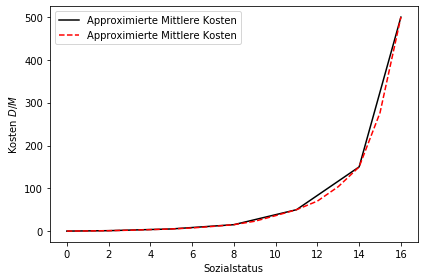

<Figure size 432x288 with 0 Axes>

In [3]:
vSO = np.array([0, 2, 5, 8, 11, 14, 16])
vKosten = np.array([0, 1, 5, 15, 50, 150, 500])

fMean = interpolate.Akima1DInterpolator(vSO, vKosten)
vx = np.array(range(0, 17))#np.linspace(2, 16, 10**2)
vy = fMean(vx)

plt.plot(vSO, vKosten, 'k-', label='Approximierte Mittlere Kosten')
plt.plot(vx, vy, 'r--', label='Approximierte Mittlere Kosten')

plt.xlabel('Sozialstatus')
plt.ylabel('Kosten $D/M$')

plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.clf()

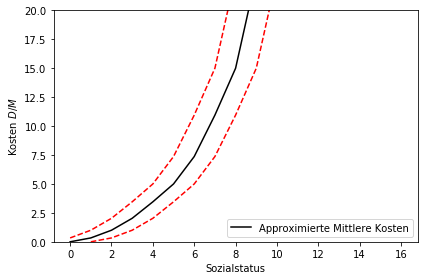

<Figure size 432x288 with 0 Axes>

In [4]:
vx_u1 = np.array(range(2, 17))
vx_l1 = np.array(range(1, 16))
vy_u1 = fMean(vx_u1)
vy_l1 = fMean(vx_l1)

fUpBoun = interpolate.Akima1DInterpolator(vx[0:-1], vy[1:])
fLoBoun = interpolate.Akima1DInterpolator(vx[1:], vy[0:-1])
vUpBoun = fUpBoun(vx[0:-1])
vLoBoun = fLoBoun(vx[1:])

plt.plot(vx, vy, 'k-', label='Approximierte Mittlere Kosten')
plt.plot(vx[0:-1], vUpBoun, 'r--')
plt.plot(vx[1:], vLoBoun, 'r--')

plt.xlabel('Sozialstatus')
plt.ylabel('Kosten $D/M$')
plt.ylim(0, 20)

plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.clf()

In [17]:
vSO = 9

vMean, vUpper, vLower = fgetCosts(vSO)
vMean = np.round(vMean, 1)
vUpper = np.round(vUpper, 1)
vLower = np.round(vLower, 1)

print('Mittlerer Kosten: {} D/M; Bounds: {} D/M | {} D/M'.format(vMean, vUpper, vLower))

Mittlerer Kosten: 23.0 D/M; Bounds: 36.1 D/M | 15.0 D/M


In [5]:
17*30

510

In [6]:
1200-510

690